In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

nltk.download('stopwords')
nltk.download('words')
nltk.download('maxent_ne_chunker')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [2]:
df2=pd.read_csv("/content/train.csv")

In [3]:
print(df2.shape)

(41152, 2)


In [4]:
#To get the first few rows in a dataset
df2.head()


,text,Y
0,advice Talk neighbours family exchange phone n...,2
1,Coronavirus Australia: Woolworths give elderly...,2
2,"My food stock one empty... PLEASE, panic, THER...",2
3,"Me, ready go supermarket outbreak. Not I'm par...",0
4,As news regionÂs first confirmed COVID- case ...,2


In [5]:
#renaming the column to specific name
df2=df2.rename(columns={'Y':'Score'})

In [7]:
df2['text'].isnull().sum()
df2['Score'].isnull().sum()

0

In [8]:
#To get a specific data
df2["text"].values[102]

"This also needs said: going grocery store cannot done completely safely. Meaning, without risk getting spreading it. You reduce risk staying ft people &amp; washing hands, can't eliminate it. /"

# **USING Natural Language Toolkit (NLTK)**

In [9]:
example=df2["text"][102]
print(example)

This also needs said: going grocery store cannot done completely safely. Meaning, without risk getting spreading it. You reduce risk staying ft people &amp; washing hands, can't eliminate it. /


##To show how Nltk Works

In [10]:
#Tokeninzation
tokens=nltk.word_tokenize(example)
tokens[:21]

['This',
 'also',
 'needs',
 'said',
 ':',
 'going',
 'grocery',
 'store',
 'can',
 'not',
 'done',
 'completely',
 'safely',
 '.',
 'Meaning',
 ',',
 'without',
 'risk',
 'getting',
 'spreading',
 'it']

In [11]:
#Stop-word
stop_words=set(stopwords.words('english'))
# print(stop_words)
after_removal=[]
for t in tokens:
  if t not in stop_words:
      after_removal.append(t)
print(after_removal)


['This', 'also', 'needs', 'said', ':', 'going', 'grocery', 'store', 'done', 'completely', 'safely', '.', 'Meaning', ',', 'without', 'risk', 'getting', 'spreading', '.', 'You', 'reduce', 'risk', 'staying', 'ft', 'people', '&', 'amp', ';', 'washing', 'hands', ',', 'ca', "n't", 'eliminate', '.', '/']


In [12]:
#part-of-speech_tag

# https://www.guru99.com/pos-tagging-chunking-nltk.html
# for reference what every abbreviation means

tagged=nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('also', 'RB'),
 ('needs', 'VBZ'),
 ('said', 'VBD'),
 (':', ':'),
 ('going', 'VBG'),
 ('grocery', 'NN'),
 ('store', 'NN'),
 ('can', 'MD'),
 ('not', 'RB')]

In [13]:
# entity extraction
nltk.chunk.ne_chunk(tagged).pprint()

(S
  This/DT
  also/RB
  needs/VBZ
  said/VBD
  :/:
  going/VBG
  grocery/NN
  store/NN
  can/MD
  not/RB
  done/VBN
  completely/RB
  safely/RB
  ./.
  Meaning/NNP
  ,/,
  without/IN
  risk/NN
  getting/VBG
  spreading/VBG
  it/PRP
  ./.
  You/PRP
  reduce/VB
  risk/NN
  staying/VBG
  ft/JJ
  people/NNS
  &/CC
  amp/NN
  ;/:
  washing/VBG
  hands/NNS
  ,/,
  ca/MD
  n't/RB
  eliminate/VB
  it/PRP
  ./.
  //VB)


##DATA PRE-PROCESSING

In [14]:
def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)  # Removing URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Removing non-alphabetic characters
    text = text.lower()  # Converting to lowercase
    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)

df2['processed_text'] = df2['text'].apply(preprocess_text)

In [15]:
df2.head()

,text,Score,processed_text
0,advice Talk neighbours family exchange phone n...,2,advic talk neighbour famili exchang phone numb...
1,Coronavirus Australia: Woolworths give elderly...,2,coronaviru australia woolworth give elderli di...
2,"My food stock one empty... PLEASE, panic, THER...",2,food stock one empti pleas panic enough food e...
3,"Me, ready go supermarket outbreak. Not I'm par...",0,readi go supermarket outbreak im paranoid food...
4,As news regionÂs first confirmed COVID- case ...,2,news region first confirm covid case came sull...


### TRAIN TEST SPLIT

In [16]:
from sklearn.utils import shuffle
df2 = shuffle(df2, random_state=42)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df2['processed_text'], df2['Score'], test_size=0.2, random_state=42)



#Visualizing data

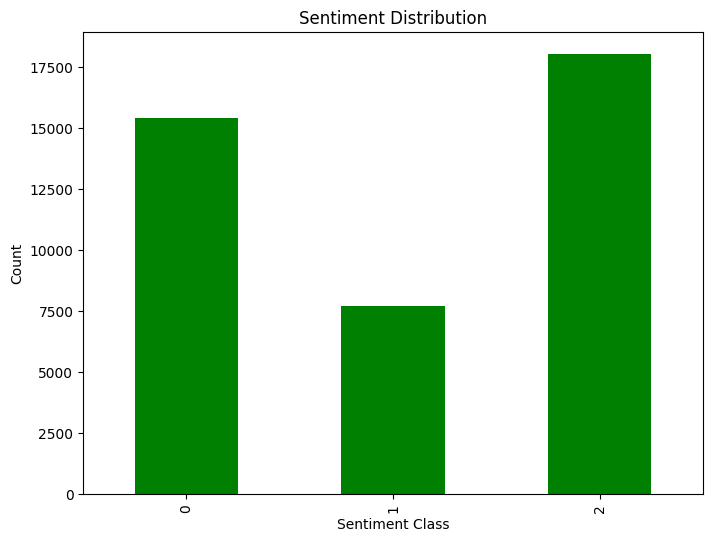

In [18]:
plt.figure(figsize=(8, 6))
df2['Score'].value_counts().sort_index().plot(kind='bar', color='green')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Class')
plt.ylabel('Count')
plt.show()

In [19]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer()

In [20]:
#used to check the sentiment of the
sia.polarity_scores(example)

{'neg': 0.088, 'neu': 0.801, 'pos': 0.112, 'compound': -0.0559}

In [21]:
res={}
for i, row in tqdm(df2.iterrows(),total=len(df2)):
    text=row['text']
    res[i]=sia.polarity_scores(text)


  0%|          | 0/41152 [00:00<?, ?it/s]

In [22]:
newdf= pd.DataFrame(res).T
print(newdf.head())
newdf=newdf.reset_index().rename(columns={'index':'id'})
print(newdf.head())
df2=df2.reset_index().rename(columns={'index':'id'})
newdf=newdf.merge(df2,how='left')
newdf

         neg    neu    pos  compound
38601  0.000  1.000  0.000    0.0000
36652  0.228  0.772  0.000   -0.6705
37192  0.392  0.309  0.299   -0.2263
29821  0.237  0.504  0.259    0.0772
1331   0.000  0.716  0.284    0.7996
      id    neg    neu    pos  compound
0  38601  0.000  1.000  0.000    0.0000
1  36652  0.228  0.772  0.000   -0.6705
2  37192  0.392  0.309  0.299   -0.2263
3  29821  0.237  0.504  0.259    0.0772
4   1331  0.000  0.716  0.284    0.7996


,id,neg,neu,pos,compound,text,Score,processed_text
0,38601,0.000,1.000,0.000,0.0000,Online Food Shopping: Coronovirus Latest here...,1,onlin food shop coronoviru latest
1,36652,0.228,0.772,0.000,-0.6705,Coronavirus Latest: Major Meat Processors Shut...,0,coronaviru latest major meat processor shut pl...
2,37192,0.392,0.309,0.299,-0.2263,Some good information COVID- scams:,0,good inform covid scam
3,29821,0.237,0.504,0.259,0.0772,Northland residents urged panic supermarket wo...,2,northland resid urg panic supermarket worker t...
4,1331,0.000,0.716,0.284,0.7996,Totally agree piece great deal concern crowds ...,2,total agre piec great deal concern crowd super...
...,...,...,...,...,...,...,...,...
41147,6265,0.183,0.536,0.281,0.2960,Congratulations Supermarket owner Hitesh Palta...,2,congratul supermarket owner hitesh palta take ...
41148,11284,0.000,0.769,0.231,0.6597,What mean self employed offered far enough liv...,2,mean self employ offer far enough live incom s...
41149,38158,0.065,0.795,0.140,0.3802,"Yes, get - thing cloud ..! . Coronavirus linge...",2,ye get thing cloud coronaviru linger air longe...
41150,860,0.223,0.777,0.000,-0.3182,I know grocery store worker things past days s...,0,know groceri store worker thing past day shock...


<Axes: xlabel='Score', ylabel='compound'>

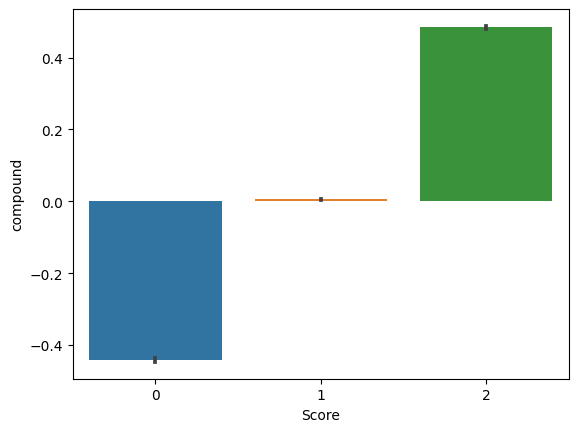

In [23]:
#getting the realtion between the
sns.barplot(data=newdf, x='Score',y='compound')

##**TRAINING MODEL**

In [24]:
pip install scikit-learn keras tensorflow


In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

In [27]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

In [28]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC


# Example using DistilBERT for classification
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')



# Build a pipeline
model_pipeline1 = Pipeline([
    ('tfidf', TfidfVectorizer(tokenizer=tokenizer.encode)),
    ('classifier', SVC())])  #79

model_pipeline2 = Pipeline([
    ('tfidf', TfidfVectorizer(tokenizer=tokenizer.encode)),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42)) ])  #72

model_pipeline3 = Pipeline([
    ('tfidf', TfidfVectorizer(tokenizer=tokenizer.encode)),
    ('classifier', GradientBoostingClassifier(n_estimators=100, random_state=42)) ]) #69

model_pipeline4 = Pipeline([
    ('tfidf', TfidfVectorizer(tokenizer=tokenizer.encode)),
    ('classifier', MultinomialNB()) ]) #65

model_pipeline5 = Pipeline([
    ('tfidf', TfidfVectorizer(tokenizer=tokenizer.encode)),
    ('classifier', BernoulliNB())     #68

])


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [29]:
# Train the model
try:
  model_pipeline1.fit(X_train, y_train)
  model_pipeline2.fit(X_train, y_train)
  model_pipeline3.fit(X_train, y_train)
  model_pipeline4.fit(X_train, y_train)
  model_pipeline5.fit(X_train, y_train)
except:
  print("If there is any expception")

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


###Testing

In [52]:
from sklearn.metrics import precision_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

# Make predictions
y_pred_SVC = model_pipeline1.predict(X_test)
y_pred_randomforest = model_pipeline2.predict(X_test)
y_pred_Gradientboost = model_pipeline3.predict(X_test)
y_pred_Multinomial = model_pipeline4.predict(X_test)
y_pred_bernoulli = model_pipeline5.predict(X_test)

# Evaluate precision
precision1 = precision_score(y_test, y_pred_SVC , average='weighted')
precision2 = precision_score(y_test, y_pred_randomforest , average='weighted')
precision3 = precision_score(y_test, y_pred_Gradientboost, average='weighted')
precision4 = precision_score(y_test, y_pred_Multinomial, average='weighted')
precision5 = precision_score(y_test, y_pred_bernoulli, average='weighted')

print(f'Precision1: {precision1}')
print(f'Precision2: {precision2}')
print(f'Precision3: {precision3}')
print(f'Precision4: {precision4}')
print(f'Precision5: {precision5}')

print('\n')

# Display classification report
print('Classification Report1:\n', classification_report(y_test, y_pred_SVC))
print('Classification Repor2:\n',  classification_report(y_test, y_pred_randomforest))
print('Classification Repor3:\n',  classification_report(y_test, y_pred_Gradientboost))
print('Classification Repor4:\n',  classification_report(y_test, y_pred_Multinomial))
print('Classification Repor5:\n',  classification_report(y_test, y_pred_bernoulli))

report1=classification_report(y_test, y_pred_SVC, output_dict=True)
report2=classification_report(y_test, y_pred_randomforest, output_dict=True)
report3=classification_report(y_test, y_pred_Gradientboost, output_dict=True)
report4=classification_report(y_test, y_pred_Multinomial, output_dict=True)
report5=classification_report(y_test, y_pred_bernoulli, output_dict=True)

Precision1: 0.7890718890466311
Precision2: 0.7221684915275878
Precision3: 0.6933687452634362
Precision4: 0.7062001259484453
Precision5: 0.6855920896726355


Classification Report1:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      3085
           1       0.78      0.59      0.67      1522
           2       0.79      0.86      0.82      3624

    accuracy                           0.79      8231
   macro avg       0.79      0.75      0.76      8231
weighted avg       0.79      0.79      0.79      8231

Classification Repor2:
               precision    recall  f1-score   support

           0       0.75      0.72      0.73      3085
           1       0.68      0.52      0.59      1522
           2       0.72      0.81      0.76      3624

    accuracy                           0.72      8231
   macro avg       0.71      0.68      0.69      8231
weighted avg       0.72      0.72      0.72      8231

Classification Repor3:
         

<Axes: >

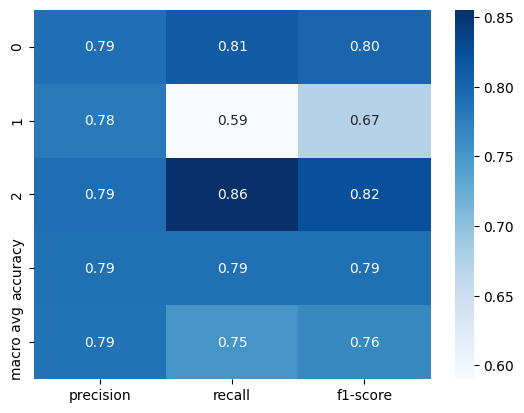

In [58]:
# Convert the classification report to a DataFrame
df_report_SVC = pd.DataFrame(report1).transpose()
df_report_randomforest = pd.DataFrame(report2).transpose()
df_report_gradientboost = pd.DataFrame(report3).transpose()
df_report_multinomial = pd.DataFrame(report4).transpose()
df_report_bernoulli = pd.DataFrame(report5).transpose()
# Plot a heatmap
sns.heatmap(df_report_SVC.iloc[:-1, :-1], annot=True, cmap='Blues', fmt=".2f")

<Axes: >

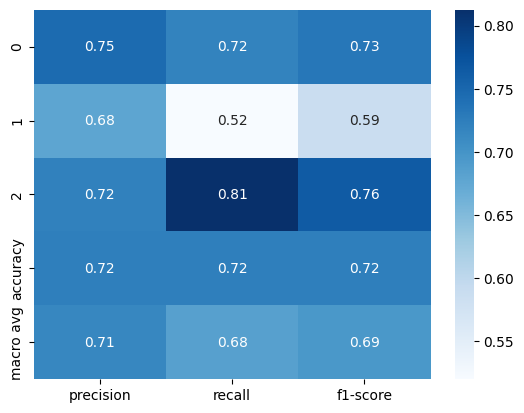

In [59]:
sns.heatmap(df_report_randomforest.iloc[:-1, :-1], annot=True, cmap='Blues', fmt=".2f")


<Axes: >

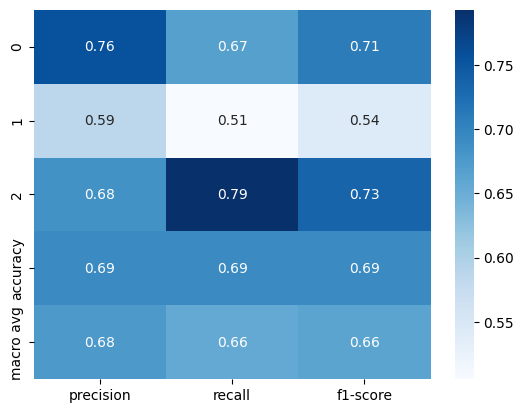

In [60]:
sns.heatmap(df_report_gradientboost.iloc[:-1, :-1], annot=True, cmap='Blues', fmt=".2f")


<Axes: >

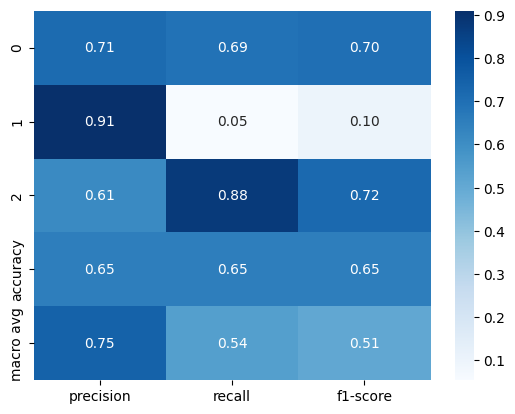

In [61]:
sns.heatmap(df_report_multinomial .iloc[:-1, :-1], annot=True, cmap='Blues', fmt=".2f")


<Axes: >

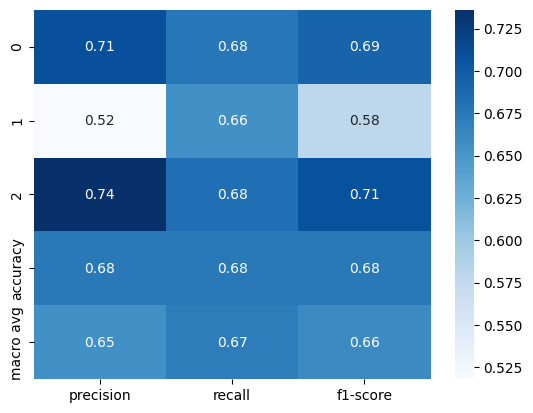

In [62]:
sns.heatmap(df_report_bernoulli.iloc[:-1, :-1], annot=True, cmap='Blues', fmt=".2f")

In [63]:
# Compute accuracy
accuracy1 = accuracy_score(y_test, y_pred_SVC)
accuracy2 = accuracy_score(y_test, y_pred_randomforest)
accuracy3 = accuracy_score(y_test, y_pred_Gradientboost)
accuracy4 = accuracy_score(y_test, y_pred_Multinomial)
accuracy5 = accuracy_score(y_test,y_pred_bernoulli)

print(f'Accuracy_SVC: {accuracy1:.2f}')
print(f'Accuracy_RandomForest: {accuracy2:.2f}')
print(f'Accuracy_GradientBoost: {accuracy3:.2f}')
print(f'Accuracy_multinomial: {accuracy4:.2f}')
print(f'Accuracy_bernoulli: {accuracy5:.2f}')

Accuracy_SVC: 0.79
Accuracy_RandomForest: 0.72
Accuracy_GradientBoost: 0.69
Accuracy_multinomial: 0.65
Accuracy_bernoulli: 0.68


In [36]:
from sklearn.metrics import confusion_matrix

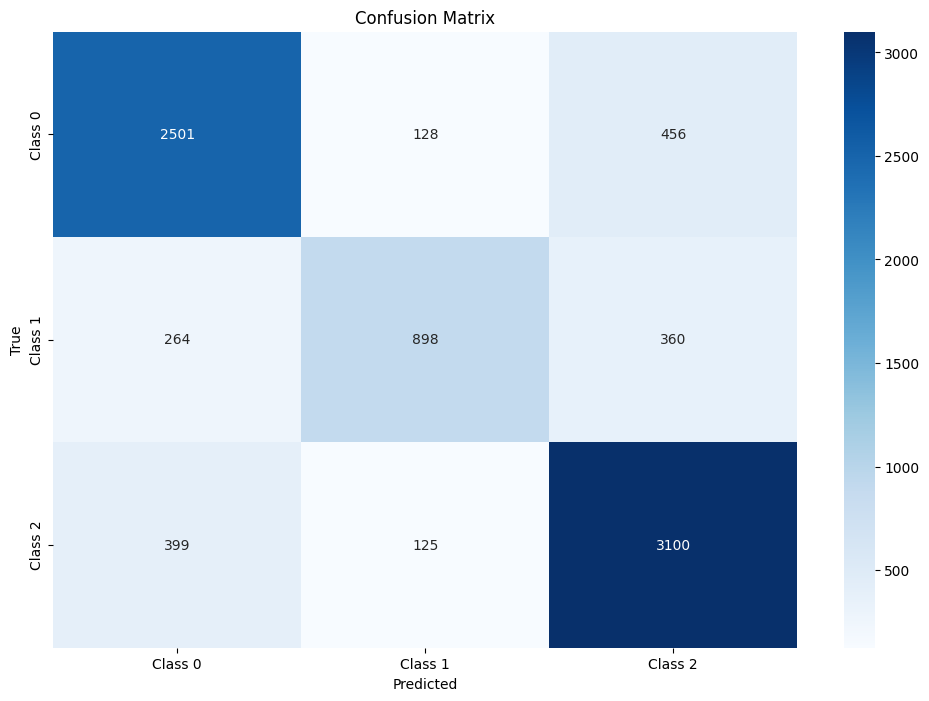

In [38]:
conf_matrix = confusion_matrix(y_test, y_pred_SVC)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()